### 从预处理到出结果的流程

In [1]:
from numpy import *
from kNN import classify0
%matplotlib inline

In [2]:
def file2matrix(filename): #文本解析为特征矩阵和标签向量
    fr = open(filename)
    numberOfLines = len(fr.readlines())#读行数
    returnMat = zeros((numberOfLines,3))#构建numberOfLines行、3列的零矩阵
    classLabelVector = []
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip() #去掉每行首尾的空格
        listFromLine = line.split('\t')#按tab分割
        returnMat[index,:] = listFromLine[0:3]#把该行的前三个数据复制到returnMat的第index行
        classLabelVector.append(int(listFromLine[-1]))#把该行最后一列放在标签向量里
        index += 1 #准备处理原零矩阵下一行
    return returnMat,classLabelVector

datingDataMat,datingLabels=file2matrix('datingTestSet2.txt')
#该文本文件前三列依次为：飞行里程，游戏时间，冰淇淋量

In [3]:
def autoNorm(dataSet): #归一化(飞行里程数值很大，会盖过其他两个特征的贡献)
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0) #取每列最小、最大值，组成一个横向量
    ranges = maxVals - minVals #求每列的极差
    normDataSet = zeros(shape(dataSet)) #构建与dataSet大小相同的零矩阵
    m = dataSet.shape[0] #行数
    normDataSet = dataSet - tile(minVals, (m,1)) #竖着堆m行的“列最小值” as 减数，从input里减去
    normDataSet = normDataSet/tile(ranges, (m,1)) #差值除以极差，得到归一化之后的数据
    return normDataSet, ranges, minVals

normMat, ranges, minVals = autoNorm(datingDataMat)

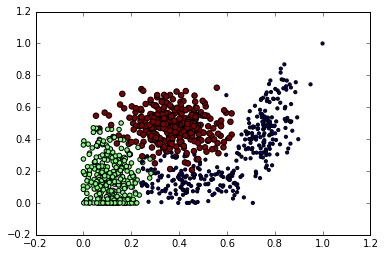

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)#参数三个1依次表示把画板分成1行、1列，图像画在第1个格子上。非inline plot时才能看到期望中的效果
ax.scatter(normMat[:,0], normMat[:,1], 10.0*array(datingLabels), 10.0*array(datingLabels)) #用归一化后的第0列和第1列画图
plt.show()

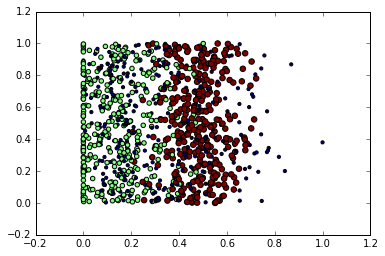

In [5]:
fig = plt.figure()
bx = fig.add_subplot(111)
bx.scatter(normMat[:,1], normMat[:,2], 10.0*array(datingLabels), 10.0*array(datingLabels))
plt.show()

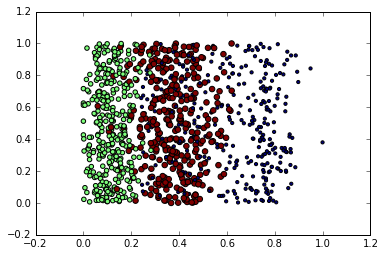

In [6]:
fig = plt.figure()
cx = fig.add_subplot(111)
cx.scatter(normMat[:,0], normMat[:,2], 10.0*array(datingLabels), 10.0*array(datingLabels))
plt.show()

In [7]:
#测试器
def datingClassTest():
    hoRatio = 0.10 #设定测试集的大小
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    #shape属性是个元组(行数,列数)，所以用[0]取到行数
    numTestVecs = int(m*hoRatio)#选作测试集的数据量
    errorCount = 0.0
    for i in range(numTestVecs):#选的是前100个点作为测试集
        classifierResult = classify0(normMat[i,:], #第i个输入点
                                     normMat[numTestVecs:m,:], #训练集是100~999共900个点
                                     datingLabels[numTestVecs:m],3) #训练集900个样本点的标签；k=3
        
        if (classifierResult != datingLabels[i]):
            errorCount += 1.0
            print("预:%d, 实:%d <-----%d(i=%d)" % (classifierResult, datingLabels[i], errorCount, i))
        else:
            print("预:%d, 实:%d" % (classifierResult, datingLabels[i]))
    print("错误率: %f" % (errorCount/float(numTestVecs)))

#datingClassTest() #结果与书上不一样，可能数据更新了

In [8]:
#下面是实用程序
resultList = ['not at all','in small doses', 'in large doses']
percentTats = 8.  #由于是jupyter，这里就不写raw_input了
ffMiles = 3000.
iceCream = 0.7
datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')
normMat, ranges, minVals = autoNorm(datingDataMat)
inArr = array([ffMiles, percentTats, iceCream])
classifierResult = classify0((inArr-minVals)/ranges,normMat,datingLabels,3)
print("You will probably like this person:", resultList[classifierResult - 1])

You will probably like this person: in small doses
